<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/1_4_Supervised_Learning_with_scikit_learn_Preprocessing_and_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-4 Supervised Learning with scikit-learn - Preprocessing and Pipelines.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
plt.style.use('ggplot')

## Data

### Music

In [3]:
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [4]:
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,Rap
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,Electronic
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,Rock
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,Rap


## Preprocessing data

### scikit-learn requirements

- Numeric data
- No missing values

### Dealing with categorical features

- scikit-learn will not accept categorical features by default
- Need to convert categorical features into numeric variables
- Convert to binary features called **dummy variables**
  - 0: Observation was not that category
  - 1: Observation was that category

<img src="https://drive.google.com/uc?export=view&id=1P_HRPzlQHPDXmMuVONr2ZlGakgWQMVC1">

- We can actually delete the `Rock` column
- If we don't do this, we are duplicating information, which might be an issue for some models



### Music dataset

- `popularity`: Target variable
- `genre`: Categorical feature

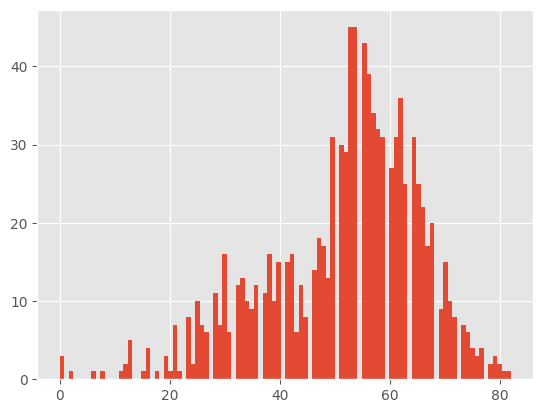

In [5]:
music_df['popularity'].hist(bins=100)
plt.show()

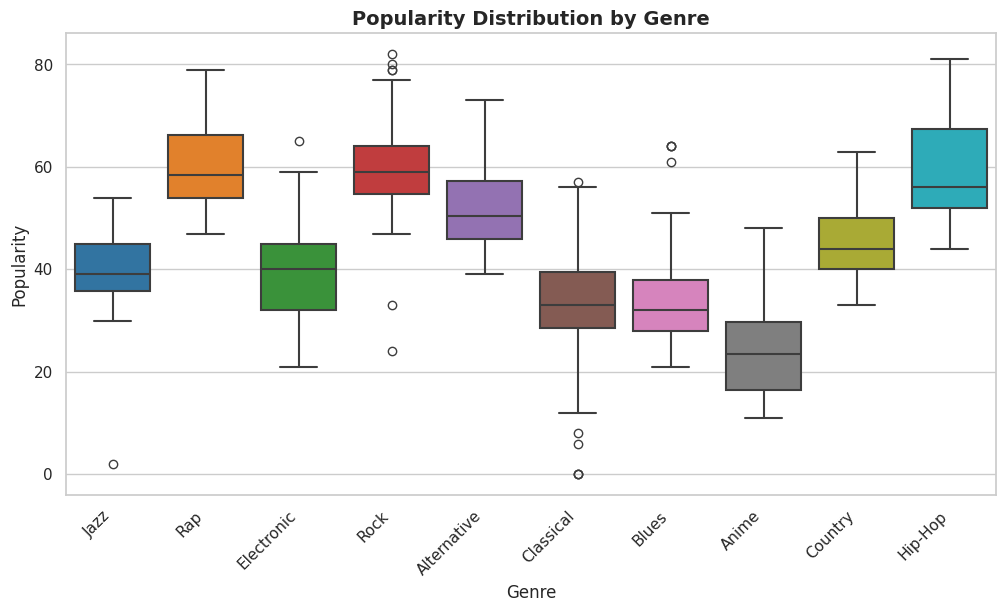

In [6]:
plt.figure(figsize=(12, 6))

sns.set_theme(style='whitegrid')
sns.boxplot(x='genre', y='popularity',
            data=music_df, linewidth=1.5,
            palette='tab10', hue='genre')

plt.title('Popularity Distribution by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate genre labels for readability

plt.show()

In [7]:
plt.style.use('ggplot')

#### `get_dummies` method 1

In [8]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [9]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
music_dummies

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True
996,False,False,False,False,True,False,False,False,False
997,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,True


In [10]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop('genre', axis=1)
music_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  Anime             1000 non-null   bool   
 12  Blues             1000 non-null   bool   
 13  Classical         1000 non-null   bool   
 14  Country           1000 non-null   bool   
 15  Electronic        1000 non-null   bool   
 16  Hip-Hop           1000 non-null   bool   
 

#### `get_dummies` method 2

- This method only works if there is only one categorical feature

In [11]:
music_dummies = pd.get_dummies(music_df, drop_first=True)
music_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre_Anime       1000 non-null   bool   
 12  genre_Blues       1000 non-null   bool   
 13  genre_Classical   1000 non-null   bool   
 14  genre_Country     1000 non-null   bool   
 15  genre_Electronic  1000 non-null   bool   
 16  genre_Hip-Hop     1000 non-null   bool   
 

### Linear Regression with dummy variables

In [12]:
X = music_dummies.drop('popularity', axis=1)
y = music_dummies['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg

LinearRegression()

In [14]:
# sklearn's cross-validation metrics presume a higher score is better,
#. so MSE is changed to negative to counteract this.
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
                            scoring='neg_mean_squared_error')
linreg_cv

array([-66.55181079, -74.49718851, -56.5918095 , -74.31436161,
       -62.62031494])

In [15]:
# We can calculate the training RMSE by taking
#. the square root and converting to positive
np.sqrt(-linreg_cv)

array([8.15792932, 8.63117538, 7.52275279, 8.6205778 , 7.91329988])

### Ridge regression with dummy variables

In [16]:
X = music_dummies.drop('popularity', axis=1)
y = music_dummies['popularity']

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge(alpha=0.2)
ridge

Ridge(alpha=0.2)

In [18]:
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")
scores

array([-68.49467657, -56.64985721, -70.89015472, -64.1558722 ,
       -80.14086371])

In [19]:
rmse = np.sqrt(-scores)
rmse

array([8.27615107, 7.52660994, 8.41962913, 8.00973609, 8.95214297])

In [20]:
# average rmse
np.mean(rmse)

8.236853840202299

In [21]:
# standard deviation of the target array
np.std(y)

14.021569099070199

An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Handling Missing Data

In [22]:
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [23]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


### Deleting rows

It is common practice to remove missing observations accounting for less than 5% of all data.

In [24]:
print(music_df2.isna().sum().sort_values() * 100 / len(music_df2))

genre                0.8
popularity           3.1
loudness             4.4
liveness             4.6
tempo                4.6
speechiness          5.9
duration_ms          9.1
instrumentalness     9.1
danceability        14.3
valence             14.3
acousticness        20.0
energy              20.0
dtype: float64


In [25]:
music_df2 = music_df2.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        892 non-null    float64
 1   acousticness      714 non-null    float64
 2   danceability      765 non-null    float64
 3   duration_ms       863 non-null    float64
 4   energy            714 non-null    float64
 5   instrumentalness  863 non-null    float64
 6   liveness          892 non-null    float64
 7   loudness          892 non-null    float64
 8   speechiness       839 non-null    float64
 9   tempo             892 non-null    float64
 10  valence           765 non-null    float64
 11  genre             892 non-null    object 
dtypes: float64(11), object(1)
memory usage: 90.6+ KB


In [26]:
print(music_df2.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


### Imputing values

- **Imputation**: use domain knowledge to replace missing data with educated guesses
- Common to use the mean
- Can also use the median or another value
- For categorical values, we typicall use the most frequent value (the mode)
- Must split our data first to avoid **data leakage**
- Data leakage is what happens when test set information is leaked to our model

In [27]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [28]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


In [29]:
X_cat = music_df2[['genre']]
X_num = music_df2.drop(['genre', 'popularity'], axis=1)
y = music_df2['popularity']

In [30]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_cat.shape, X_test_cat.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800,), (200,))

- **NOTE**: by using the same `random_state=12` argument, the target array's values remain unchanged

In [31]:
X_train_num, X_test_num, _, _ = train_test_split(X_num, y, test_size=0.2, random_state=12)
X_train_num.shape, X_test_num.shape

((800, 10), (200, 10))

In [32]:
imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat_array = imp_cat.fit_transform(X_train_cat) # not, fit_transform
X_test_cat_array = imp_cat.transform(X_test_cat) # note, transform only on test set

In [33]:
imp_num = SimpleImputer() # default strategy is 'mean'
X_train_num_array = imp_num.fit_transform(X_train_num)
X_test_num_array = imp_num.transform(X_test_num)

In [34]:
type(X_train_cat_array), type(X_test_cat_array), type(X_train_num_array), type(X_test_num_array)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [35]:
X_train_num = pd.DataFrame(X_train_num_array,
                           columns=imp_num.get_feature_names_out(),
                           index=X_train_num.index)
X_train_cat = pd.DataFrame(X_train_cat_array,
                           columns=imp_cat.get_feature_names_out(),
                           index=X_train_cat.index)
X_test_num = pd.DataFrame(X_test_num_array,
                          columns=imp_num.get_feature_names_out(),
                          index=X_test_num.index)
X_test_cat = pd.DataFrame(X_test_cat_array,
                          columns=imp_cat.get_feature_names_out(),
                          index=X_test_cat.index)

In [36]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 56 to 843
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      800 non-null    float64
 1   danceability      800 non-null    float64
 2   duration_ms       800 non-null    float64
 3   energy            800 non-null    float64
 4   instrumentalness  800 non-null    float64
 5   liveness          800 non-null    float64
 6   loudness          800 non-null    float64
 7   speechiness       800 non-null    float64
 8   tempo             800 non-null    float64
 9   valence           800 non-null    float64
 10  genre             800 non-null    object 
dtypes: float64(10), object(1)
memory usage: 75.0+ KB


### Imputing with a pipeline



In [37]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [38]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


### Drop missing data

In [39]:
music_df2 = music_df2.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
print(music_df2.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


In [40]:
music_df2['genre'].value_counts()

,count
genre,
Rock,446
Blues,57
Hip-Hop,55
Jazz,54
Rap,52
Alternative,49
Country,48
Electronic,47
Classical,43


### Convert `genre` to a binary feature

In [41]:
music_df2['genre'] = np.where(music_df2['genre'] == 'Rock', 1, 0)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        892 non-null    float64
 1   acousticness      714 non-null    float64
 2   danceability      765 non-null    float64
 3   duration_ms       863 non-null    float64
 4   energy            714 non-null    float64
 5   instrumentalness  863 non-null    float64
 6   liveness          892 non-null    float64
 7   loudness          892 non-null    float64
 8   speechiness       839 non-null    float64
 9   tempo             892 non-null    float64
 10  valence           765 non-null    float64
 11  genre             892 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 90.6 KB


In [42]:
music_df2['genre'].value_counts()

,count
genre,
0,446
1,446


### Pipeline for song genre prediction

- Note that each step in a pipeline, except for the last, must be a transformer

In [43]:
X = music_df2.drop('genre', axis=1)
y = music_df2['genre']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((624, 11), (268, 11), (624,), (268,))

In [45]:
imputer = SimpleImputer()

knn = KNeighborsClassifier(n_neighbors=3)

# pipeline steps
steps = [('imputer', imputer),
         ('knn', knn)]

In [46]:
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [47]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [48]:
y_pred = pipeline.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [49]:
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[74 61]
 [57 76]]


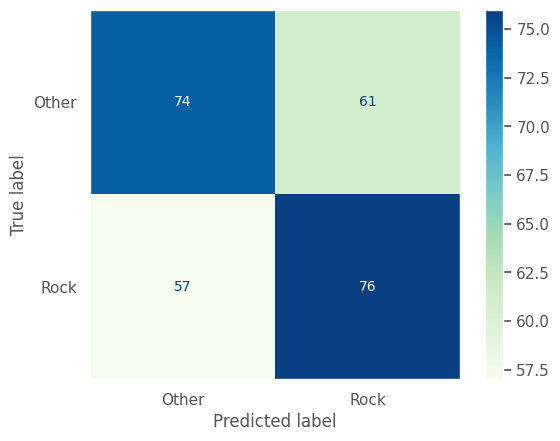

In [50]:
ConfusionMatrixDisplay(conf_m, display_labels=['Other', 'Rock']).plot(cmap=plt.cm.GnBu)
plt.grid(False)
plt.show()

## Centering and scaling

In [51]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [52]:
music_df[['duration_ms', 'loudness', 'speechiness']].describe()

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
25%,1.806562e+05,-9.775500,0.033100
50%,2.163000e+05,-6.855000,0.043600
75%,2.605025e+05,-4.977750,0.074950
max,1.617333e+06,-0.883000,0.710000


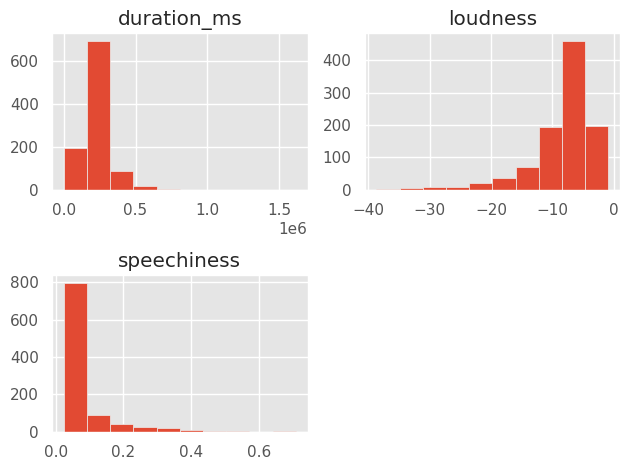

In [53]:
music_df[['duration_ms', 'loudness', 'speechiness']].hist()
plt.tight_layout()
plt.show()

- the ranges vary greatly
    - `duration_ms` ranges from 0 to 1.6 million
    - `speechiness` contains only decimal places
    - `loudness` has only negative values

### Why scale our data?

- Many models use some form of distance to inform them
- Features on larger scales can disproportionately influence the model
- KNN uses distance explicitly when making predictions
- We want features to be on a similar scale
- We can normalize or standardize our data (scaling and centering)

### How to scale our data

- Subtract the mean and divide by the variance
    - All features are centered around zero and have a variance of one
    - The sklearn docs for StandardScaler defines it as divsion by the standard deviation, not the varince
    - This is called **standardization**
- We can also subtract the minimum and divide by the range
    - The normalized dataset has minimum zero and maximum 1
    - This is called **normalization**
    - Can also normalize so the data ranges from -1 to +1

### Scaling in scikit-learn

```python
from sklearn.preprocessing import StandardScaler

X = music_df.drop('genre', axis=1)
y = music_df['genre']

# split data first to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

In [54]:
music = music_df[['duration_ms', 'loudness', 'speechiness']]
music.mean().values, music.min().values, music.max().values

(array([ 2.17220438e+05, -8.25330500e+00,  7.78789000e-02]),
 array([-1.0000e+00, -3.8718e+01,  2.3400e-02]),
 array([ 1.617333e+06, -8.830000e-01,  7.100000e-01]))

In [55]:
scaler = StandardScaler()

scaled_music = scaler.fit_transform(music)

In [56]:
scaler = StandardScaler()

scaled_music = scaler.fit_transform(music)
print(scaled_music.mean(axis=0), scaled_music.min(axis=0), scaled_music.max(axis=0))

# manually
# mean doesn't match exactly, but min and max does
#. but mean is very close to 0 in all cases, so it is just a floating point precicion error?
manual_test = (music - music.mean()) / music.std(ddof=0) # notice ddof=0, instead of default of 1
print(manual_test.mean(axis=0).values, manual_test.min(axis=0).values, manual_test.max(axis=0).values)

[ 5.86197757e-17  1.84741111e-16 -5.15143483e-17] [-1.84870302 -5.90865625 -0.60934339] [11.9159156   1.42947759  7.07023842]
[ 5.77315973e-17  1.74082970e-16 -5.24025268e-17] [-1.84870302 -5.90865625 -0.60934339] [11.9159156   1.42947759  7.07023842]


### Scaling in a pipeline

```python
steps = [('scaler', StandardSacler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

# split data first to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

knn_scaled.score(X_test, y_test)
```

### CV and scaling in a pipelline

```python
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardSacler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange(1, 50)}

# split data first to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = GridSearchCV(pipeline, param_grid=parameters)

cf.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)
```

### Centering and Scaling for regression

In [57]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)

music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [58]:
music_df['genre'].value_counts()

,count
genre,
0,500
1,500


In [59]:
X = music_df.drop('loudness', axis=1)
y = music_df['loudness']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 11), (300, 11), (700,), (300,))

In [61]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.5))])

In [62]:
# default score for Lasso is R-squared
pipeline.score(X_test, y_test)

0.6741253234390785

## Centering and scaling for classification

In [63]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)

music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [64]:
X = music_df.drop('genre', axis=1)
y = music_df['genre']

In [65]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [66]:
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [68]:
cv = GridSearchCV(pipeline, param_grid=parameters)
cv

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])})

In [69]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])})

In [70]:
cv.best_score_, cv.best_params_

(0.8487499999999999, {'logreg__C': 0.7896842105263158})

## Evaluating multiple models

How do we decide which model to use in the first place?

### Different models for different problems

#### Some guilding principles

- Size of dataset
    - Fewer features means a simpler model, faster training time
    - Some models (like artificial neural networks) require large amounts of data to perform well
- Interpretability
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coefficients
- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is more flexible, does not assume any linear relationships


### It's all in the metrics (for comparing model performance)

- Regression model performance:
    - RMSE
    - R-squared
- Classification model performance
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC
- Train several models and evaluate performance out of the box (without hyperparameter tuning)

### A note on scaling

- Models affected by scaling:
    - KNN
    - Linear Regression (plus Ridge, Lasso)
    - Logistic Regression
    - Artificial Neural Network
- Best to scale our data before evaluation models


### Evaluating classification models

In [71]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)

music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [72]:
X = music_df.drop('genre', axis=1)
y = music_df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 11), (250, 11), (750,), (250,))

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier()}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
    # default score is accuracy
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

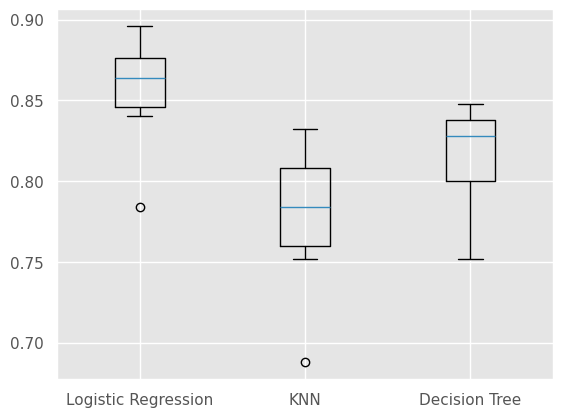

In [75]:
plt.boxplot(results, tick_labels=models.keys())
plt.show()

### Test set performance

In [76]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    # accuracy is the default score
    test_score = model.score(X_test_scaled, y_test)
    print(f'{name} Test Set Accuracy: {test_score}')

Logistic Regression Test Set Accuracy: 0.856
KNN Test Set Accuracy: 0.792
Decision Tree Test Set Accuracy: 0.82


### Visualizing regression model peformance

In [77]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)

music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [78]:
X = music_df.drop(['energy'], axis=1)
y = music_df['energy']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(alpha=0.1),
          'Lasso': Lasso(alpha=0.1)}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    # default score is R-sqaured
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

In [82]:
results

[array([0.81516217, 0.79344142, 0.71423688, 0.78181627, 0.84592742,
        0.7643577 ]),
 array([0.81517325, 0.79343457, 0.71426525, 0.78180164, 0.84591067,
        0.76437239]),
 array([0.5698616 , 0.51902977, 0.54224029, 0.524727  , 0.52495448,
        0.54389226])]

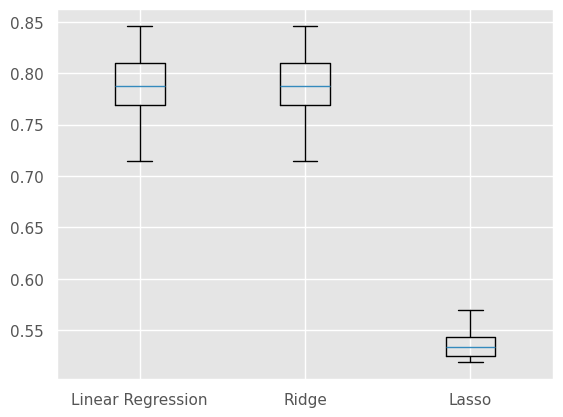

In [83]:
plt.boxplot(results, tick_labels=models.keys())
plt.show()

### Predicting on the test set

In [84]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred)
    print(f'{name} Test Set RMSE: {test_rmse}')

Linear Regression Test Set RMSE: 0.013144800155042864
Ridge Test Set RMSE: 0.013144987984520828
Lasso Test Set RMSE: 0.02497882164557376


### Pipeline for predicting genre

In [85]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2['genre'] = np.where(music_df2['genre'] == 'Rock', 1, 0)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [86]:
X = music_df2.drop('genre', axis=1)
y = music_df2['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 11), (250, 11), (750,), (250,))

In [87]:
steps = [('imp_mean', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

params = {'logreg__solver': ['newton-cg', 'saga', 'lbfgs'],
          'logreg__C': np.linspace(0.001, 1.0, 10)}

tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imp_mean', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                         'logreg__solver': ['newton-cg', 'saga', 'lbfgs']})

In [88]:
y_pred = tuning.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0])

In [89]:
tuning.best_params_, tuning.score(X_test, y_test)

({'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, 0.82)